In [90]:
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [62]:
rows = Path("./Global YouTube Statistics.csv").read_text().split("\n")
rows = [row.split(",") for row in rows]
header = rows[0]
rows = rows[1:-1]
rows[1:10]

[['2',
  'YouTube Movies',
  '170000000',
  '0',
  'Film & Animation',
  'youtubemovies',
  '1',
  'United States',
  'US',
  'Games',
  '4055159',
  '7670',
  '7423',
  '12',
  '0',
  '0.05',
  '0.04',
  '0.58',
  'nan',
  '2006',
  'Mar',
  '5',
  '88.2',
  '328239523',
  '14.7',
  '270663028',
  '37.09024',
  '-95.712891'],
 ['3',
  'MrBeast',
  '166000000',
  '28368841870',
  'Entertainment',
  'MrBeast',
  '741',
  'United States',
  'US',
  'Entertainment',
  '48',
  '1',
  '1',
  '1348000000',
  '337000',
  '5400000',
  '4000000',
  '64700000',
  '8000000',
  '2012',
  'Feb',
  '20',
  '88.2',
  '328239523',
  '14.7',
  '270663028',
  '37.09024',
  '-95.712891'],
 ['4',
  'Cocomelon - Nursery Rhymes',
  '162000000',
  '1.64E+11',
  'Education',
  'Cocomelon - Nursery Rhymes',
  '966',
  'United States',
  'US',
  'Education',
  '2',
  '2',
  '1',
  '1975000000',
  '493800',
  '7900000',
  '5900000',
  '94800000',
  '1000000',
  '2006',
  'Sep',
  '1',
  '88.2',
  '328239523',
  

In [64]:
print(header)
subscribers = torch.tensor([float(row[2]) for row in rows])
uploads = torch.tensor([float(row[6]) for row in rows])
views = torch.tensor([float(row[3]) for row in rows])

['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title', 'uploads', 'Country', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_month', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


In [111]:
x = subscribers
x_label = "subs"
y = views
y_label = "views"

In [112]:
mean_x = x.mean()
mean_y = y.mean()

Text(0, 0.5, 'views')

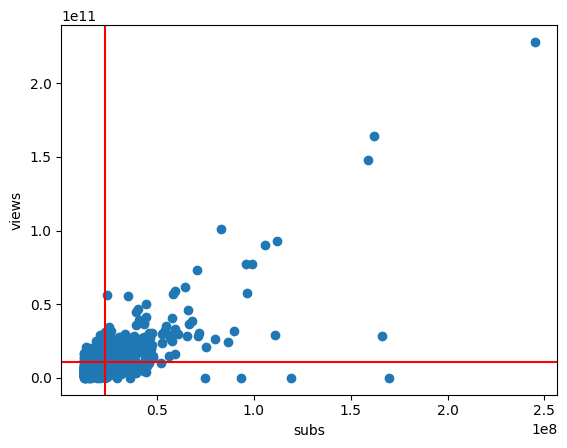

In [113]:
plt.scatter(x, y)
plt.axhline(mean_y, color='r')
plt.axvline(mean_x, color='r')
plt.xlabel(x_label)
plt.ylabel(y_label)

In [114]:
numerator = 0.0
N = len(x)
x_std = 0.0
y_std = 0.0
for i in range(len(subscribers)):
    numerator += (x[i]-mean_x)*(y[i]-mean_y)
    x_std += (x[i]-mean_x)**2
    y_std += (y[i]-mean_y)**2

x_std = torch.sqrt(x_std/N)
y_std = torch.sqrt(y_std/N)
pearson = numerator/x_std/y_std/N
pearson

tensor(0.7510)

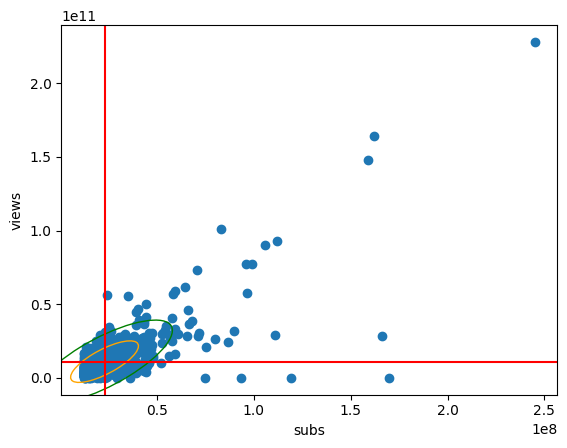

In [116]:
f, ax = plt.subplots(1,1)
ax.scatter(x, y)
ax.axhline(mean_y, color='r')
ax.axvline(mean_x, color='r')
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
scale_x = 2 * x_std
scale_y = 2 * y_std
ellipse_1s = Ellipse(
    (0,0),
    width=torch.sqrt(1+pearson),
    height=torch.sqrt(1-pearson),
    facecolor='none',
    edgecolor='orange')
ellipse_2s = Ellipse(
    (0,0),
    width=2*torch.sqrt(1+pearson),
    height=2*torch.sqrt(1-pearson),
    facecolor='none',
    edgecolor='green')
transform = transforms.Affine2D() \
    .rotate_deg(45) \
    .scale(scale_x, scale_y) \
    .translate(mean_x, mean_y)
ellipse_1s.set_transform(transform + ax.transData)
ellipse_2s.set_transform(transform + ax.transData)
ax.add_patch(ellipse_1s)
ax.add_patch(ellipse_2s)